# Implementácia teórie grafov v Pythone

V tomto [datasete](https://www.kaggle.com/giovamata/airlinedelaycauses/version/2) máme záznamy o viac ako 7 miliónoch letov z USA s viacerými premennými.

Pre účel tohto príkladu použijeme len zopár z nich (prvých 50 000 záznamov). Tieto záznamy najdete v súbore [airlines_data.csv](airlines_data.csv).

Našou prvou úlohou bude zistiť, ako sa dostať čo najkratšou (v zmysle vzdialenosti) trasou z daného lestika do inej destinácie. Ďalšou úlohou bude nájsť takú kombináciu letov, aby čas strávený vo vzduchu bol čo najkratší.

Premenné, ktoré budú pre nás zaujímavé sú:

- **Origin**: letisko vzletu,
- **Dest**: letisko pristátia,
- **Distance**: vzdialenosť letiska pristátia od letiska vzletu,
- **AirTime**: čas letu (v minútach).

Najskôr si naimportujeme naše dáta pomocou modulu `pandas` a funkcie `read_csv()`. Pokiaľ nie sú potrebné všetky stĺpce z datasetu, môžeme použiť parameter `usecols` pre výber stĺpcov, ktoré sú pre nás zaujímavé.

In [2]:
import pandas as pd
data = pd.read_csv("airlines_data.csv", usecols = ["Origin", "Dest", "Distance", "AirTime"])

Teraz si môžeme pozrieť zopár prvých radkov datasetu pomocou metódy `head()`.

In [3]:
data.head()

,AirTime,Origin,Dest,Distance
0,116.0,IAD,TPA,810
1,113.0,IAD,TPA,810
2,76.0,IND,BWI,515
3,77.0,IND,BWI,515
4,87.0,IND,JAX,688


Keďže chceme využiť teóriu grafov, je potrebné dáta reprezentovať ako graf, teda určiť, čo sú vrcholy a čo hrany. Nech všetky letiská reprezentujú vrcholy a letecké spojenia budú reprezentovať hrany.

Budeme používať modul `NetworkX` pre tvorbu a vizualizáciu grafov. `NetworkX` je modul okrem iného aj pre tvorbu, úpravu, štúdium štruktúry, dynamiky sietí. Dokumentáciu nájdete tu [NetworkX](https://networkx.org/documentation/stable/_downloads/networkx_reference.pdf).

Po importovaní tohto modulu vytvoríme hrany a vrcholy nášho grafu použitím uložených dát:

In [4]:
import networkx as nx
G = nx.from_pandas_edgelist(data, source = "Origin", target = "Dest", edge_attr = True, create_using=nx.DiGraph())

Toto nám uloží vrcholy a hrany automaticky. Vrcholy a hrany grafu môžeme rýchlo vypísať.

In [5]:
G.nodes()

NodeView(('IAD', 'TPA', 'IND', 'BWI', 'JAX', 'LAS', 'MCO', 'MDW', 'PHX', 'ISP', 'FLL', 'PBI', 'RSW', 'JAN', 'HOU', 'BHM', 'BNA', 'PHL', 'ABQ', 'ALB', 'AMA', 'AUS', 'BDL', 'BOI', 'BUF', 'BUR', 'CLE', 'CMH', 'DEN', 'ELP', 'GEG', 'LAX', 'LBB', 'LIT', 'MAF', 'MCI', 'MHT', 'MSY', 'OAK', 'OKC', 'OMA', 'ONT', 'ORF', 'PDX', 'PIT', 'PVD', 'RDU', 'RNO', 'SAN', 'SAT', 'SDF', 'SEA', 'SFO', 'SJC', 'SLC', 'SMF', 'SNA', 'STL', 'TUL', 'TUS', 'DAL', 'DTW', 'HRL', 'CRP', 'ROC', 'EWR', 'IAH', 'ORD', 'SYR', 'MYR', 'GSO', 'SAV', 'CRW', 'RIC', 'FAT', 'COS', 'MRY', 'LGB', 'BFL', 'EUG', 'ICT', 'MEM', 'BTV', 'CAE', 'MKE', 'LFT', 'DFW', 'BRO', 'PWM', 'DAY', 'MSP', 'SRQ', 'CLT', 'GSP', 'TYS', 'SHV', 'CVG', 'MFE', 'ATL', 'HSV', 'DCA', 'BTR', 'CHS', 'MSN', 'LRD', 'VPS', 'AVL', 'GPT', 'LGA', 'ABE', 'BGR', 'GRR', 'MOB', 'PNS', 'CHA', 'MGM', 'TLH', 'XNA', 'GRK', 'PSP', 'LEX', 'LCH', 'BOS', 'MTJ', 'AEX', 'BPT', 'MLU', 'DSM', 'CLL', 'DAB', 'ASE', 'ATW', 'BMI', 'CAK', 'CID', 'ILM', 'JFK', 'CPR', 'DRO', 'RAP', 'EGE', 'FL

In [6]:
G.edges()

OutEdgeView([('IAD', 'TPA'), ('IAD', 'MDW'), ('IAD', 'MCO'), ('IAD', 'LAS'), ('IAD', 'CLE'), ('IAD', 'EWR'), ('IAD', 'IAH'), ('IAD', 'ATL'), ('IAD', 'BNA'), ('IAD', 'BOS'), ('IAD', 'CHS'), ('IAD', 'CLT'), ('IAD', 'HSV'), ('IAD', 'JAX'), ('IAD', 'LGA'), ('IAD', 'MDT'), ('IAD', 'ORF'), ('IAD', 'PIT'), ('IAD', 'PWM'), ('IAD', 'ROA'), ('IAD', 'SAT'), ('IAD', 'SAV'), ('IAD', 'SPI'), ('IAD', 'AUS'), ('IAD', 'BHM'), ('IAD', 'CAE'), ('IAD', 'GSP'), ('IAD', 'MCI'), ('IAD', 'PHL'), ('IAD', 'PVD'), ('IAD', 'RDU'), ('IAD', 'SYR'), ('IAD', 'DTW'), ('IAD', 'ROC'), ('IAD', 'BDL'), ('IAD', 'MYR'), ('IAD', 'GSO'), ('IAD', 'MHT'), ('IAD', 'DCA'), ('IAD', 'CVG'), ('TPA', 'ABQ'), ('TPA', 'ALB'), ('TPA', 'BDL'), ('TPA', 'BHM'), ('TPA', 'BNA'), ('TPA', 'BUF'), ('TPA', 'BWI'), ('TPA', 'CMH'), ('TPA', 'DEN'), ('TPA', 'FLL'), ('TPA', 'HOU'), ('TPA', 'IAD'), ('TPA', 'ISP'), ('TPA', 'JAX'), ('TPA', 'LAS'), ('TPA', 'MCI'), ('TPA', 'MDW'), ('TPA', 'MHT'), ('TPA', 'MSY'), ('TPA', 'PBI'), ('TPA', 'PHL'), ('TPA', 'PH

Nakreslime a vizualizujeme graf pomocou modulu `matplotlib` a funkcie `draw_networkx()`.

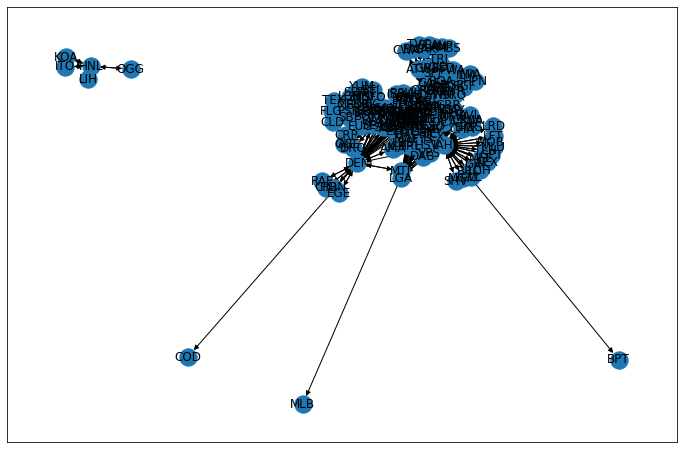

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 8))
nx.draw_networkx(G, with_labels = True)

Predpokladajme, že pasažiar chce vziať najkratšiu cestu medzi **IAD** (Washington) a **SAN** (San Diego). V tomto nám pomôže teória grafov. Použijeme *Dijkstrov algoritmus*.

In [8]:
celkova_vzdialenost, najkratsia_cesta_vzialenost = nx.single_source_dijkstra(G, source = "IAD", target = "SAN", weight = "Distance")
celkova_vzdialenost, najkratsia_cesta_vzialenost

(2257, ['IAD', 'CVG', 'STL', 'ABQ', 'SAN'])

Toto je najkratšia možná cesta (z našich dát) medzi dvoma letiskami na základe ich vzdialenosti. 

Poďme sa teraz pozrieť na najkratšiu cestu vzhľadom na čas strávený vo vzduchu.

In [11]:
celkovy_cas, najkratsia_cesta_cas = nx.single_source_dijkstra(G, source = "IAD", target = "SAN", weight = "AirTime")
celkovy_cas, najkratsia_cesta_cas

(326.0, ['IAD', 'BNA', 'SAN'])